In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Make a dummy-source image (point source)

In [2]:
imgsize = 256

In [3]:
realimage = np.zeros((imgsize, imgsize))

In [4]:
# pixel at the center, normalize
realimage[(imgsize/2), (imgsize/2)] = 1 # 1 pixel

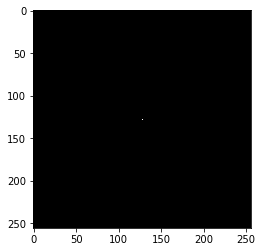

In [5]:
plt.imshow(realimage, cmap="Greys_r")

### FFT

In [6]:
F = np.fft.fft2(realimage)
print(F.shape)

(256, 256)


In [7]:
F_mag = np.abs(np.fft.fftshift(F))
F_phase = np.angle(np.fft.fftshift(F))

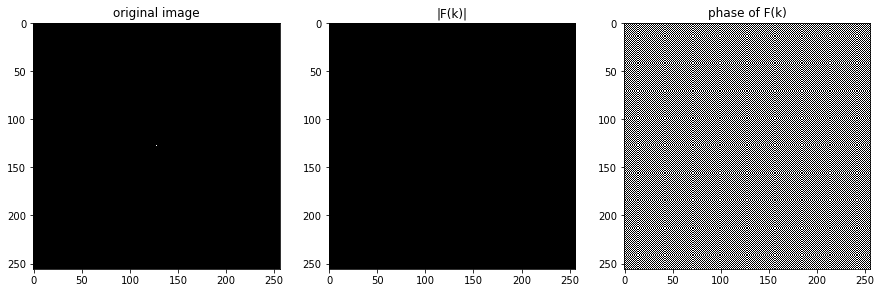

In [8]:
plt.rc("font", size=10)
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(realimage, cmap='Greys_r')
plt.title("original image")

plt.subplot(132)
plt.imshow(np.log(F_mag), cmap='Greys_r')
plt.title("|F(k)|")

plt.subplot(133)
plt.imshow(F_phase, cmap='Greys_r')
plt.title("phase of F(k)")

plt.show()

In [9]:
### try to inverse it again

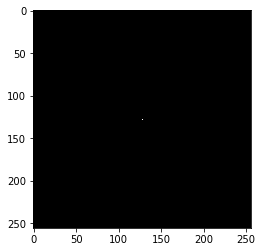

In [10]:
Fnew = F_mag*np.exp(1j*F_phase)
fnew = np.fft.ifft2(np.fft.ifftshift(Fnew))
plt.imshow(np.abs(fnew), cmap='Greys_r')

In [11]:
np.sum(np.abs(fnew)) # good numerical accuracy

1.0

### Sampling

In [28]:
nsample = 100

u = np.random.randint(0, imgsize, nsample)
v = np.random.randint(imgsize/2, imgsize, nsample)

# mirroring
# sample in uv is 2*nsample
umirror = imgsize-1 -u #-u
vmirror = imgsize-1 -v #-v

# combine (mask)
uc = np.zeros((imgsize, imgsize), dtype=np.int)
uc[u,v] = 1
uc[umirror, vmirror] = 1
print uc.shape

(256, 256)


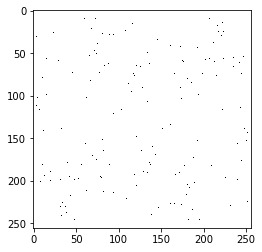

In [29]:
plt.imshow(uc, cmap="Greys")

In [30]:
# visibility
vis = uc * (F_mag * np.exp(1j*F_phase)) # sampling by masking

In [31]:
vis.shape

(256, 256)

### Check the sampled-visibility

In [32]:
center = imgsize/2 - 0.5, imgsize/2 - 0.5

In [33]:
center

(127.5, 127.5)

In [34]:
len(vis[np.abs(vis)>0.0])

200

In [35]:
uvdist = []
amp = []

for i, row in enumerate(uc):
    for j, col in enumerate(row):
        if uc[i,j] == 1:
            # calculate distance
            dist = np.sqrt((i-center[0])**2 + (j-center[1])**2)
            uvdist.append(dist)
            amp.append(F_mag[i,j])

In [36]:
print len(uvdist), len(amp)

200 200


In [37]:
np.sum(amp)

200.0

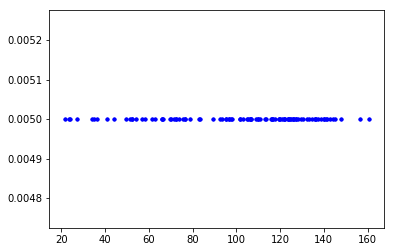

In [38]:
plt.plot(uvdist, amp/np.sum(amp), 'b.') # flat

In [39]:
fnew = np.fft.ifft2(np.fft.ifftshift(vis))

In [40]:
np.sum(np.abs(fnew))

11.282791064961275

In [41]:
fnew = fnew/np.sum(np.abs(fnew))

In [42]:
np.sum(np.abs(fnew))

0.99999999999999978

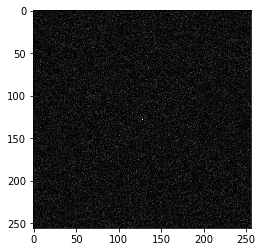

In [43]:
plt.imshow(np.abs(fnew), cmap='Greys_r')